In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


import matplotlib.pyplot as plt
import datetime
import plotly
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

import lightgbm as lgb
import gc

# 데이터 불러오기

In [2]:
#데이터 불러오기
train = pd.read_csv('train.csv')
print(train.shape)
train.info()

(4701217, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              object 
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  object 
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    object 
 22  targ

In [11]:
train

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,20211104,목,16,1,107,-,0,0,50.0,...,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,20220331,목,2,2,107,-,0,0,80.0,...,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,20220613,월,22,2,103,일반국도12호선,0,0,60.0,...,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,20211020,수,2,2,103,일반국도95호선,0,0,80.0,...,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


In [12]:
train.iloc[10:11,:]

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
10,TRAIN_0000010,20220623,목,11,1,103,일반국도99호선,0,0,60.0,...,0,노루생이,33.419423,126.491495,없음,노루생이삼거리,33.422672,126.492935,없음,47.0


In [3]:
info = pd.read_csv('data_info.csv')
info

,변수명,변수 설명
0,id,아이디
1,base_date,날짜
2,day_of_week,요일
3,base_hour,시간대
4,road_in_use,도로사용여부
5,lane_count,차로수
6,road_rating,도로등급
7,multi_linked,중용구간 여부
8,connect_code,연결로 코드
9,maximum_speed_limit,최고속도제한


In [4]:
#데이터 중복확인
print(len(train[train.id.duplicated()]))

# 데이터 null값 확인
train.isnull().sum()

0


id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64

# EDA
- 날짜, 시간
- 제한 
- 도로수
- 도로명
- 위치

### 날짜
- 외부데이터를 넣는다면,, 날씨 데이터?

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] ='AppleGothic'
plt.rcParams['axes.unicode_minus'] =False

In [6]:
# 원형데이터 보존하기 위해
train_df=train.copy()

In [7]:
#날짜 분리
train_df=train_df.astype({'base_date':'str'})
train_df['datetime']=[datetime.datetime.strptime(timestamp, '%Y%m%d') for timestamp in train_df['base_date']]
train_df['year']=train_df['datetime'].dt.year
train_df['month']=train_df['datetime'].dt.month
train_df['day']=train_df['datetime'].dt.day

In [8]:
# 그룹화

train_time = train_df[['base_hour','target']]
train_time = train_time.groupby('base_hour').mean().reset_index()

train_day = train_df[['day_of_week','target']]
train_day = train_day.groupby('day_of_week').mean()
train_day = train_day.reindex(['월','화','수','목','금','토','일']).reset_index()

train_date=train_df[['day','target']]
train_date = train_date.groupby('day').mean().reset_index()

train_name = train_df[['road_name','target']]
train_name = train_name.groupby('road_name').mean().reset_index()

#year_minth열 만들기: year, month 합치기
def concat_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train_df['year_month']=train_df.datetime.apply(concat_year_month)
train_month = train_df[['year_month','target']]
train_month = train_month.groupby('year_month').mean().reset_index()


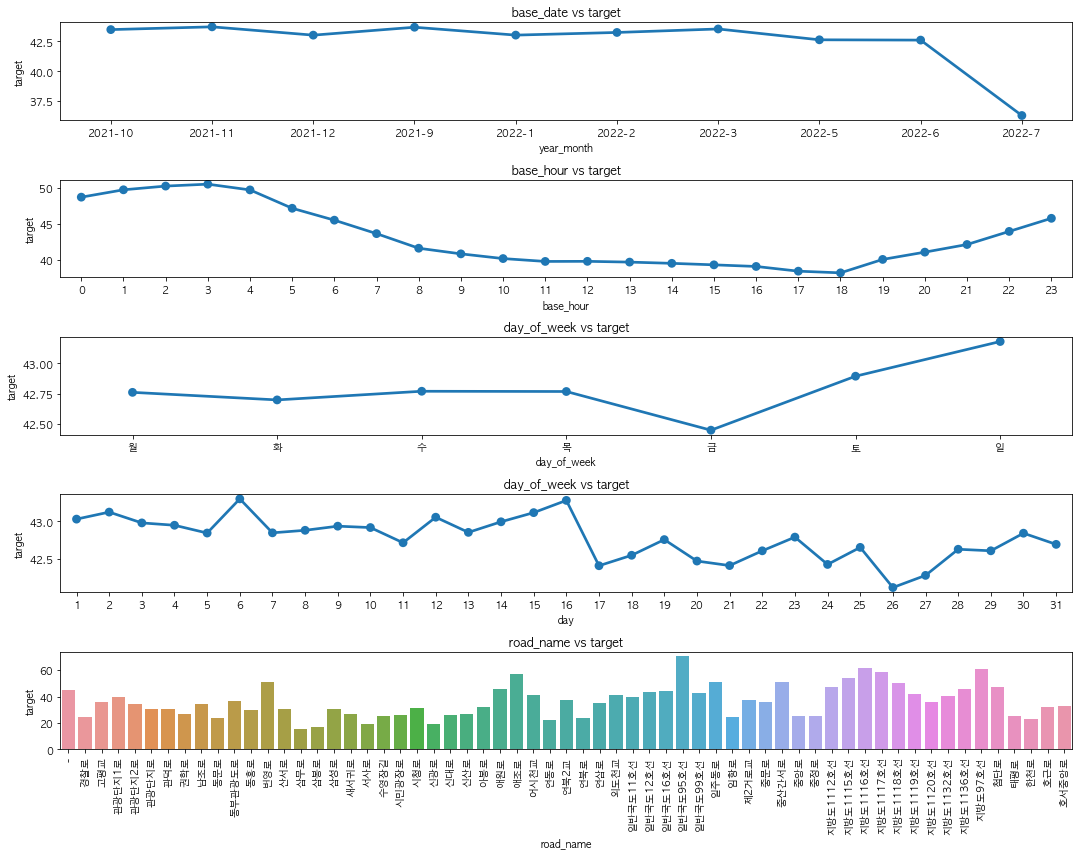

In [9]:
# 날짜 시각화
fig, axes = plt.subplots(5, figsize=(15,12))

sns.pointplot(x='year_month',y='target',data=train_month,ax=axes[0]).set(title='base_date vs target')
sns.pointplot(x='base_hour',y='target',data=train_time,ax=axes[1]).set(title='base_hour vs target')
sns.pointplot(x='day_of_week',y='target',data=train_day,ax=axes[2]).set(title='day_of_week vs target')
sns.pointplot(x='day',y='target',data=train_date,ax=axes[3]).set(title='day_of_week vs target')
sns.barplot(x='road_name',y='target',data=train_name,ax=axes[4]).set(title='road_name vs target')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 제한

In [10]:
train_df.start_turn_restricted.replace({'있음':1, '없음':0}, inplace=True)
train_df.end_turn_restricted.replace({'있음':1, '없음':0}, inplace=True)

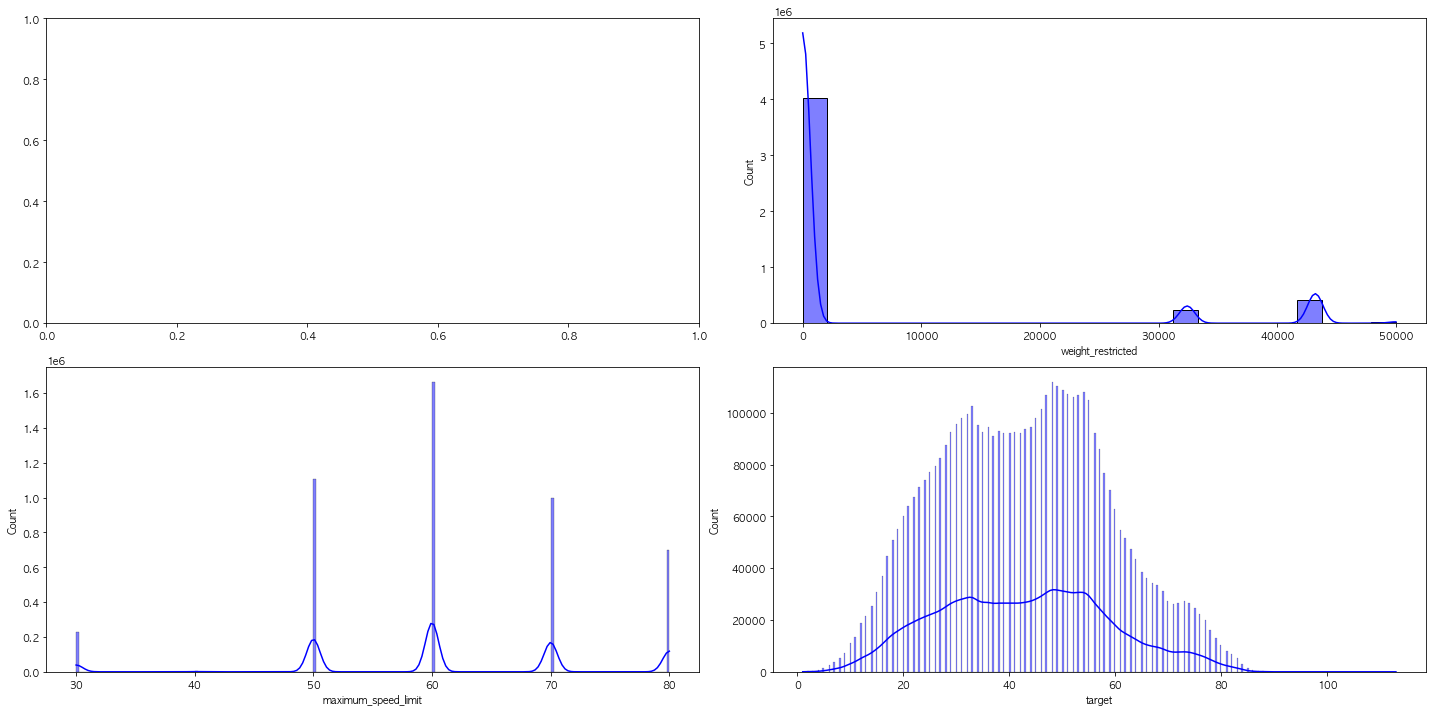

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))


sns.histplot(x=train['weight_restricted'],kde=True,ax=axes[0][1], color='blue')
sns.histplot(x=train['maximum_speed_limit'],kde=True,ax=axes[1][0], color='blue')
sns.histplot(x=train['target'],kde=True,ax=axes[1][1], color='blue')

plt.tight_layout()
plt.show()

#weight_restricted는 대부분 0, 값은 0포함 4개
# maximum_speed_limit 6개, 60, 50 ,70, 80. 30 순으로 많음
# 타겟 데이터가 skewed하지 않기 때문에 log변환은 필요없어보임..!

<AxesSubplot: xlabel='end_turn_restricted', ylabel='target'>

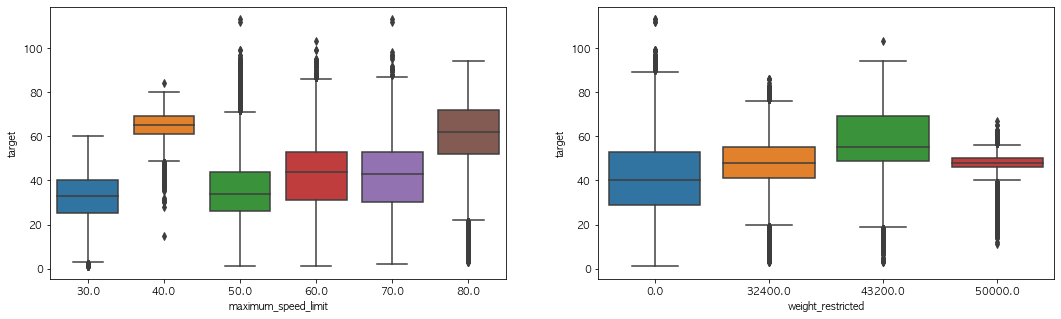

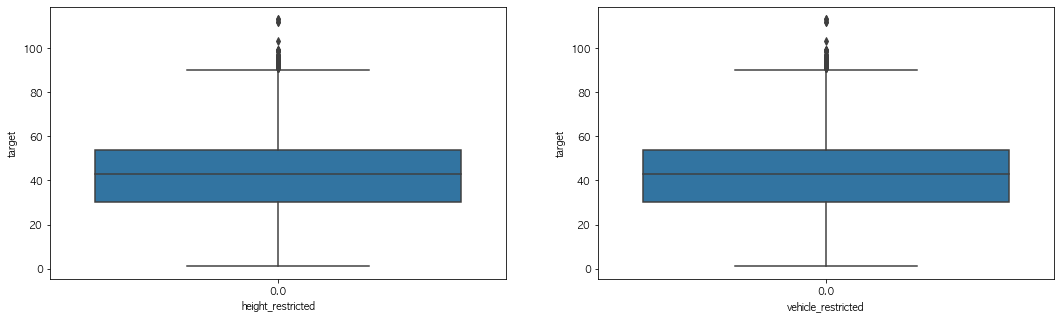

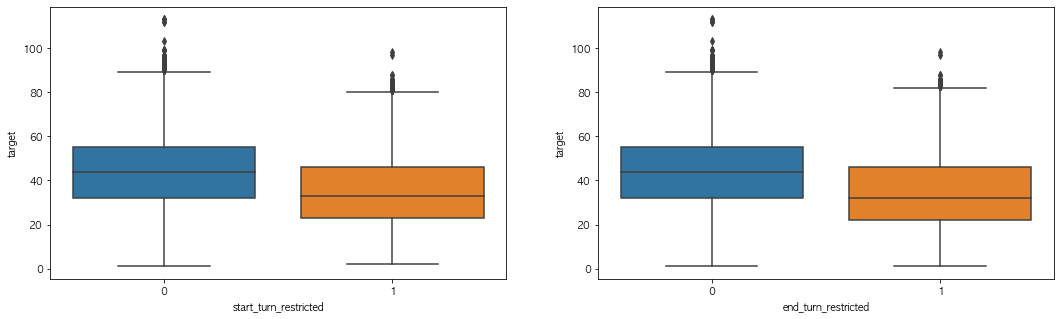

In [12]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,5)

sns.boxplot(data = train_df, x = "maximum_speed_limit", y = "target", ax=ax1)
sns.boxplot(data = train_df, x = "weight_restricted", y = "target", ax=ax2)

figure, (ax3, ax4) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,5)

sns.boxplot(data = train_df, x = "height_restricted", y = "target", ax=ax3)
sns.boxplot(data = train_df, x = "vehicle_restricted", y = "target", ax=ax4)

figure, (ax5, ax6) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,5)

sns.boxplot(data = train_df, x = "start_turn_restricted", y = "target", ax=ax5)
sns.boxplot(data = train_df, x = "end_turn_restricted", y = "target", ax=ax6)

# 최고속도 제한이 높을수록 평균 속도가 높아질 것이라 예상 하지만, 50,60,70일때 30일때와 비슷하게 낮음...왜..?
# weight 제한이 낮을수록...속도가 낮아짐. 하지만, 제일 높을때는(이상치도 많음..) 속도가 줄어들었음..
# height, vehicle 제외하도록 하겠음. 값이 하나밖에 없음. 
# 시작지점, 도착지점 둘다 회전 제한이 없을 떄 속도가 높았음

In [13]:
print(train_df.maximum_speed_limit.value_counts())
print(train_df.weight_restricted.value_counts())
print(train_df.start_turn_restricted.value_counts())
print(train_df.end_turn_restricted.value_counts())

60.0    1665573
50.0    1103682
70.0     995077
80.0     700334
30.0     229761
40.0       6790
Name: maximum_speed_limit, dtype: int64
0.0        4032874
43200.0     410361
32400.0     239305
50000.0      18677
Name: weight_restricted, dtype: int64
0    4239701
1     461516
Name: start_turn_restricted, dtype: int64
0    4239599
1     461618
Name: end_turn_restricted, dtype: int64


### 도로 수

<AxesSubplot: xlabel='connect_code', ylabel='target'>

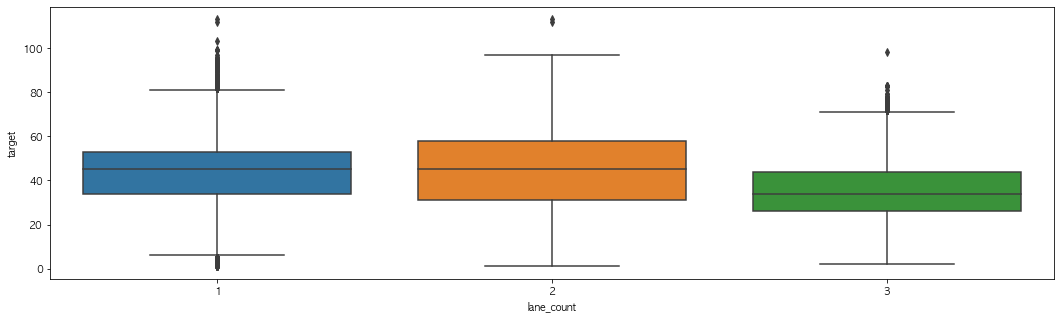

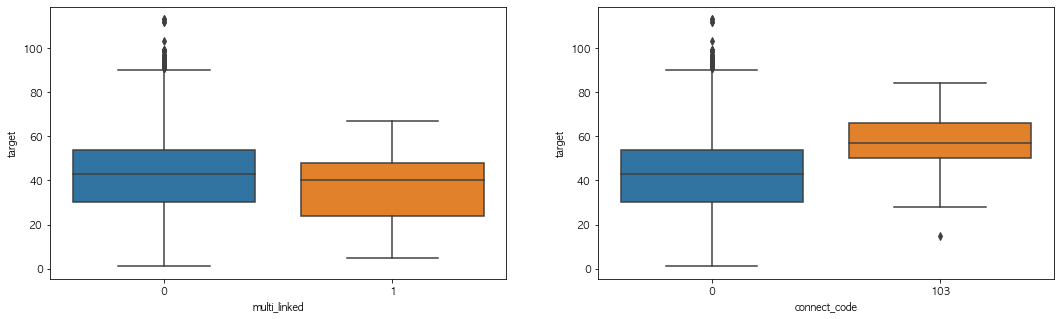

In [14]:
# 차로 수, 중용구간 여부, connect_code({000: 연결로X, 103: 일반국도 연결로})
figure, (ax1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,5)

sns.boxplot(data = train_df, x = "lane_count", y = "target", ax=ax1)

figure, (ax3, ax4) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,5)

sns.boxplot(data = train_df, x = "multi_linked", y = "target", ax=ax3)
sns.boxplot(data = train_df, x = "connect_code", y = "target", ax=ax4)

# lane count가 높을수록 속도가 빨라 질것이라 생각했는데..오히려 3개일때 낮았음
# 중용구간 여부 있을떄 속도 느림.. 근데() 거의 비슷해보임..!
# 연결로가 있을떄 확실히 속도 올라감.

In [15]:
print(train_df.lane_count.value_counts())
print(train_df.multi_linked.value_counts())
print(train_df.connect_code.value_counts())

# multi_linked 1인 값이 너무 작음

2    2352092
1    1558531
3     790594
Name: lane_count, dtype: int64
0    4698978
1       2239
Name: multi_linked, dtype: int64
0      4689075
103      12142
Name: connect_code, dtype: int64


### 도로명

In [16]:
name1=train_name[train_name.target>=40]
name1['cluster']=4
name2=train_name[(train_name.target<40)&(train_name.target>=30)]
name2['cluster']=3
name3=train_name[(train_name.target<30)&(train_name.target>=20)]
name3['cluster']=2
name4=train_name[(train_name.target<20)]
name4['cluster']=1
all_name=pd.concat([name1,name2,name3,name4], axis=0)

train_df=pd.merge(train_df,all_name, on= 'road_name', how='inner')
train_df.head()

/var/folders/sf/g5ffdfm57wv22zjhcdsjt1rm0000gn/T/ipykernel_68299/124779277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name1['cluster']=4
/var/folders/sf/g5ffdfm57wv22zjhcdsjt1rm0000gn/T/ipykernel_68299/124779277.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name2['cluster']=3
/var/folders/sf/g5ffdfm57wv22zjhcdsjt1rm0000gn/T/ipykernel_68299/124779277.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,end_longitude,end_turn_restricted,target_x,datetime,year,month,day,year_month,target_y,cluster
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,126.662335,0,52.0,2022-06-23,2022,6,23,2022-6,47.291909,4
1,TRAIN_0000090,20220608,수,17,1,106,지방도1112호선,0,0,60.0,...,126.812152,0,53.0,2022-06-08,2022,6,8,2022-6,47.291909,4
2,TRAIN_0000194,20220323,수,13,1,106,지방도1112호선,0,0,60.0,...,126.783057,0,50.0,2022-03-23,2022,3,23,2022-3,47.291909,4
3,TRAIN_0000209,20220612,일,2,1,106,지방도1112호선,0,0,60.0,...,126.744382,0,46.0,2022-06-12,2022,6,12,2022-6,47.291909,4
4,TRAIN_0000244,20220304,금,5,1,106,지방도1112호선,0,0,60.0,...,126.776546,0,47.0,2022-03-04,2022,3,4,2022-3,47.291909,4


<AxesSubplot: xlabel='road_name', ylabel='target_x'>

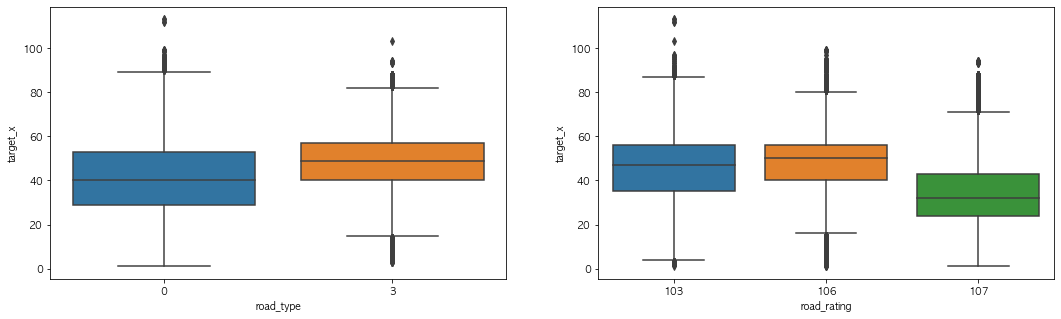

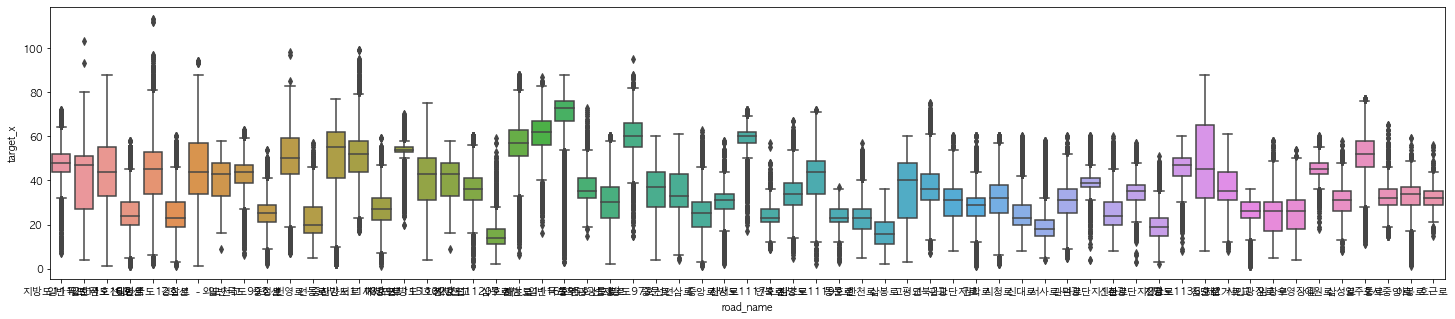

In [17]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,5)
sns.boxplot(data = train_df, x = "road_type", y = "target_x", ax=ax1)
sns.boxplot(data = train_df, x = "road_rating", y = "target_x", ax=ax2)

figure, (ax3) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(25,5)
sns.boxplot(data = train_df, x = "road_name", y = "target_x", ax=ax3)
# 도로 등급 {103: 일반국도, 107: 시도,군도, 106: 지방도}, 107번에 가장 속도가 낮음 나머지는 비슷
# 도로 타입 0,3만 존재함 어떤걸 의미하는지 모르겠음.. 하지만, 3번 타입에서 평균 속도가 상대적으로 높음

In [18]:
print(train_df.road_type.value_counts())
print(train_df.road_rating.value_counts())
print('\n')
print('도로명 개수', len(train_df.road_name.unique()))
print('\n' , train_df.road_name.value_counts())

0    3737117
3     964100
Name: road_type, dtype: int64
103    2159511
107    1582214
106     959492
Name: road_rating, dtype: int64


도로명 개수 61

 일반국도12호선    1046092
-            569463
일반국도16호선     554510
일반국도95호선     248181
일반국도11호선     215701
             ...   
애원로            7718
아봉로            7342
남조로            6813
호서중앙로          2819
호근로             587
Name: road_name, Length: 61, dtype: int64


#### 도로 이름이 '-'경우 확인해서 값 채워넣기

In [19]:
train_df[train_df.road_name=='-']

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,end_longitude,end_turn_restricted,target_x,datetime,year,month,day,year_month,target_y,cluster
2132086,TRAIN_0000006,20220106,목,0,2,107,-,0,0,60.0,...,126.269378,0,39.0,2022-01-06,2022,1,6,2022-1,44.774556,4
2132087,TRAIN_0000014,20220203,목,16,1,107,-,0,0,60.0,...,126.623867,0,58.0,2022-02-03,2022,2,3,2022-2,44.774556,4
2132088,TRAIN_0000028,20220612,일,14,2,107,-,0,0,50.0,...,126.354987,0,59.0,2022-06-12,2022,6,12,2022-6,44.774556,4
2132089,TRAIN_0000030,20220623,목,6,2,107,-,0,0,80.0,...,126.409129,0,75.0,2022-06-23,2022,6,23,2022-6,44.774556,4
2132090,TRAIN_0000031,20211028,목,15,1,107,-,0,0,60.0,...,126.696117,0,36.0,2021-10-28,2021,10,28,2021-10,44.774556,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2701544,TRAIN_4701204,20211001,금,19,1,107,-,0,0,60.0,...,126.676431,0,55.0,2021-10-01,2021,10,1,2021-10,44.774556,4
2701545,TRAIN_4701205,20220112,수,19,1,107,-,0,0,50.0,...,126.916358,0,23.0,2022-01-12,2022,1,12,2022-1,44.774556,4
2701546,TRAIN_4701208,20220323,수,19,2,107,-,0,0,80.0,...,126.737512,0,61.0,2022-03-23,2022,3,23,2022-3,44.774556,4
2701547,TRAIN_4701212,20211104,목,16,1,107,-,0,0,50.0,...,126.273750,0,20.0,2021-11-04,2021,11,4,2021-11,44.774556,4


In [20]:
print(train_df[train_df.road_name=='-'].describe().iloc[:,0:10]) # weight_restricted/ road_rating을 살펴보자
print(train_df[train_df.road_name=='-'].road_rating.value_counts()) # road_rating이 모두 107번살펴볼 필요있음
train_df[train_df.road_name=='-'].weight_restricted.value_counts()#Weight_restricted 0, 43200,32400 3가지임

           base_hour     lane_count  road_rating  multi_linked  connect_code  \
count  569463.000000  569463.000000     569463.0      569463.0      569463.0   
mean       12.339525       1.568569        107.0           0.0           0.0   
std         6.507078       0.495276          0.0           0.0           0.0   
min         0.000000       1.000000        107.0           0.0           0.0   
25%         7.000000       1.000000        107.0           0.0           0.0   
50%        13.000000       2.000000        107.0           0.0           0.0   
75%        18.000000       2.000000        107.0           0.0           0.0   
max        23.000000       2.000000        107.0           0.0           0.0   

       maximum_speed_limit  vehicle_restricted  weight_restricted  \
count        569463.000000            569463.0      569463.000000   
mean             57.522139                 0.0        6269.394851   
std              14.706931                 0.0       14817.098032   
min

0.0        481943
43200.0     68013
32400.0     19507
Name: weight_restricted, dtype: int64

In [21]:
#107번 도로에서 wighted_restricted={43200:중문로, 32400.0:산서로}
df_107=train_df[train_df.road_rating==107]
print(df_107[df_107['weight_restricted']==43200.0].road_name.value_counts())
print(df_107[df_107['weight_restricted']==0.0].road_name.value_counts())
print(df_107[df_107['weight_restricted']==32400.0].road_name.value_counts())

# 중문로, 산서로 값 채워넣기
train_df1=train_df[train_df.road_name=='-']
train_df1.loc[train_df1['weight_restricted']==43200.0,'road_name']='중문로'
train_df1.loc[train_df1['weight_restricted']==32400.0,'road_name']='산서로'
print(len(train_df1[train_df1.road_name=='-'])) #잘 바뀐것을 확인!

#107번 도로 중 wighted_restricted=0 특징을 알 수 없음..
print(df_107[df_107['weight_restricted']==0.0].describe().iloc[:,11:-1])

# road_name='-'인것 중 weight_restricted=0인거 삭제
jungmoon=train_df1[train_df1.road_name=='중문로']
sanseo=train_df1[train_df1.road_name=='산서로']
train_df=pd.concat([train_df[train_df.road_name!='-'],
                    jungmoon,sanseo],axis=0)

-      68013
중문로    11336
Name: road_name, dtype: int64
-         481943
태평로       129117
동홍로        78188
새서귀로       77942
경찰로        77889
연삼로        60208
중문로        46204
중앙로        42164
권학로        40341
시청로        34199
시민광장로      32320
중정로        30509
산서로        25061
서사로        23242
관광단지로      23116
첨단로        16684
연북로        12093
애조로        12092
연북2교       12085
제2거로교      12070
연동로        12056
한천로        11973
관덕로        11962
고평교        11950
신대로        11944
어시천교       11835
외도천교       11835
삼성로        11727
신산로        11672
관광단지1로     10706
삼무로        10634
신광로        10604
동문로        10603
수영장길       10180
관광단지2로     10126
삼봉로        10116
임항로        10091
애원로         7718
남조로         6813
호서중앙로       2819
호근로          587
Name: road_name, dtype: int64
-      19507
산서로     7940
Name: road_name, dtype: int64
481943
       start_longitude  start_turn_restricted  end_latitude  end_longitude  \
count     1.475418e+06           1.475418e+06  1.475418e+06   1.475418e+06  

In [22]:
# 없어진 것을 확인함
train_df[train_df.road_name=='-']

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,end_longitude,end_turn_restricted,target_x,datetime,year,month,day,year_month,target_y,cluster


### 위치

<AxesSubplot: xlabel='cluster', ylabel='target_x'>

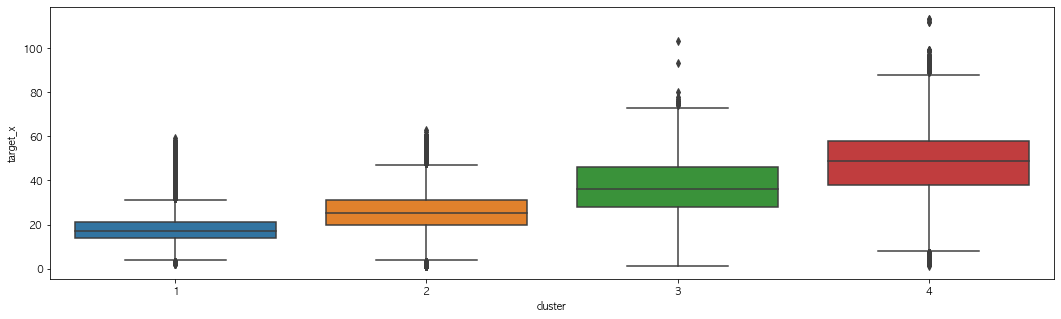

In [23]:
figure, (ax1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,5)

sns.boxplot(data = train_df, x = "cluster", y = "target_x", ax=ax1)

# feature engineering
- 여기서 부터는 데이터가 너무 커서 줄여서 예측기를 돌리도록 하겠습니다:)
- 날짜 + 시간

### test_날짜관련 특성공학

In [24]:
test=pd.read_csv('test.csv')
test.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted
0,TEST_000000,20220825,목,17,3,107,연삼로,0,0,70.0,...,0.0,0,산지2교,33.499427,126.541298,없음,제주은행사거리,33.500772,126.543837,있음
1,TEST_000001,20220809,화,12,2,103,일반국도12호선,0,0,70.0,...,0.0,3,중문입구,33.258507,126.427003,없음,관광단지입구,33.258119,126.415840,없음
2,TEST_000002,20220805,금,2,1,103,일반국도16호선,0,0,60.0,...,0.0,0,도순3교,33.258960,126.476508,없음,도순2교,33.259206,126.474687,없음
3,TEST_000003,20220818,목,23,3,103,일반국도11호선,0,0,70.0,...,0.0,0,아라주공아파트,33.473494,126.545647,없음,인다마을,33.471061,126.545467,없음
4,TEST_000004,20220810,수,17,3,106,번영로,0,0,70.0,...,0.0,0,부록교 시종점,33.501477,126.569223,없음,봉개교 시종점,33.496863,126.581230,없음


In [25]:
#날짜 분리
test_df=test.astype({'base_date':'str'})
test_df['datetime']=[datetime.datetime.strptime(timestamp, '%Y%m%d') for timestamp in test_df['base_date']]
test_df['year']=test_df['datetime'].dt.year
test_df['month']=test_df['datetime'].dt.month
test_df['day']=test_df['datetime'].dt.day
test_df['quarter']=test_df['datetime'].dt.quarter

In [26]:
#day_s열 만들기 -->16일을 기준으로 2파트로 나누기
test_df.loc[test_df['day']<=16, 'day_s']=0
test_df.loc[test_df['day']>16, 'day_s']=1

# grouping열 만들기
# 그룹1(0시~4시), 그룹2(5시~7시), 그룹3(8시~18시), 그룹4(19시~23시)
g1=[0,1,2,3,4]
g2=[5,6,7]
g3=[8,9,10,11,12,13,14,15,16,17,18]
g4=[19,20,21,22,23]
test_df.loc[test_df['base_hour'].isin(g1), 'grouping']=1
test_df.loc[test_df['base_hour'].isin(g2), 'grouping']=2
test_df.loc[test_df['base_hour'].isin(g3), 'grouping']=3
test_df.loc[test_df['base_hour'].isin(g4), 'grouping']=4

In [27]:
test_df=pd.merge(test_df,all_name, on= 'road_name', how='inner')
test_df.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,end_turn_restricted,datetime,year,month,day,quarter,day_s,grouping,target,cluster
0,TEST_000000,20220825,목,17,3,107,연삼로,0,0,70.0,...,있음,2022-08-25,2022,8,25,3,1.0,3.0,35.053946,3
1,TEST_000038,20220823,화,21,3,107,연삼로,0,0,70.0,...,있음,2022-08-23,2022,8,23,3,1.0,4.0,35.053946,3
2,TEST_000095,20220807,일,14,3,107,연삼로,0,0,70.0,...,있음,2022-08-07,2022,8,7,3,0.0,3.0,35.053946,3
3,TEST_000115,20220814,일,21,3,107,연삼로,0,0,70.0,...,있음,2022-08-14,2022,8,14,3,0.0,4.0,35.053946,3
4,TEST_000130,20220817,수,20,3,107,연삼로,0,0,70.0,...,없음,2022-08-17,2022,8,17,3,1.0,4.0,35.053946,3


In [28]:
# label encoding
cat_features=['maximum_speed_limit','weight_restricted']
for col in cat_features:
    le = LabelEncoder()
    le=le.fit(train_df[col])
    train_df[col]=le.transform(train_df[col])
        
    for label in np.unique(test_df[col]):
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test_df[col]=le.transform(test_df[col])

In [29]:
test_df=pd.get_dummies(data = test_df, columns = ['road_rating','grouping','day_s',
                                                  'road_type',
                                                  'start_turn_restricted','connect_code',
                                                  'end_turn_restricted'])

### train_날짜관련 특성공학

In [30]:
#day_s열 만들기 -->16일을 기준으로 2파트로 나누기
train_df.loc[train_df['day']<=16, 'day_s']=0
train_df.loc[train_df['day']>16, 'day_s']=1

# grouping열 만들기
# 그룹1(0시~4시), 그룹2(5시~7시), 그룹3(8시~18시), 그룹4(19시~23시)
g1=[0,1,2,3,4]
g2=[5,6,7]
g3=[8,9,10,11,12,13,14,15,16,17,18]
g4=[19,20,21,22,23]
train_df.loc[train_df['base_hour'].isin(g1), 'grouping']=1
train_df.loc[train_df['base_hour'].isin(g2), 'grouping']=2
train_df.loc[train_df['base_hour'].isin(g3), 'grouping']=3
train_df.loc[train_df['base_hour'].isin(g4), 'grouping']=4

train_df=pd.get_dummies(data = train_df, columns = ['road_rating','grouping','day_s',
                                                    'road_type',
                                                    'start_turn_restricted','connect_code',
                                                    'end_turn_restricted'])

In [ ]:
# 시각화 
# figure, (ax1) = plt.subplots(nrows=1, ncols=1)
# figure.set_size_inches(18, 5)

# sns.pointplot(data=train_df, x='day_s', y='target_x', ax=ax2)

# figure, (ax3) = plt.subplots(nrows=1, ncols=1)
# figure.set_size_inches(18, 5)

# sns.pointplot(data=train_df, x='grouping', y='target_x', ax=ax3)

### 예측기에 넣을 columns 상관관계 확인

In [31]:
feature=['day_s','grouping',
         'weight_restricted','maximum_speed_limit',
         'road_rating_103','road_rating_106','road_rating_107',
         'road_type_3','cluster','connect_code_0',
         'multi_linked','lane_count']

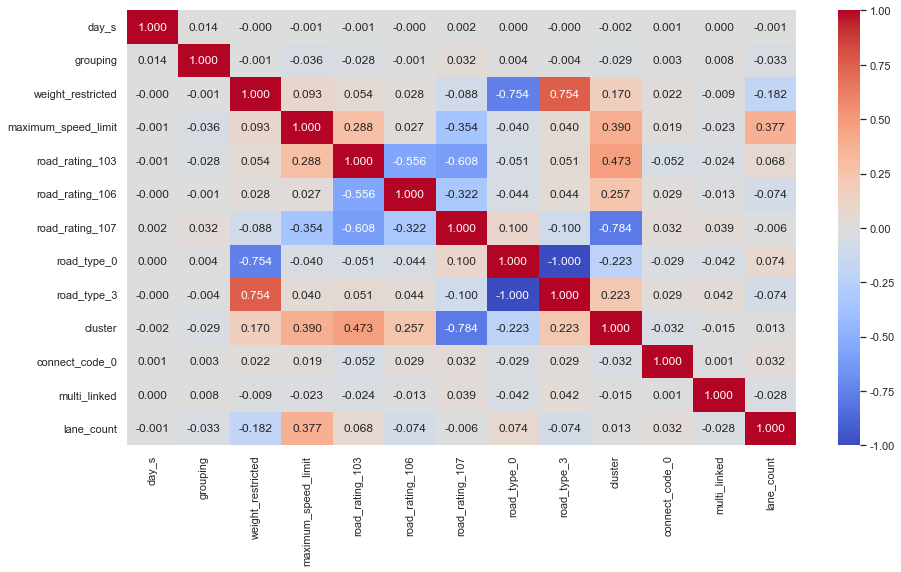

In [32]:
#sns.set(font_scale=0.5)
sns.heatmap(train_df[feature].corr(), annot=True, fmt='.3f', cmap='coolwarm')
sns.set(rc = {'figure.figsize':(15,8)})

In [35]:
train_df[feature].corrwith(train_df.target_x).sort_values()

road_rating_107       -0.430959
grouping              -0.179879
lane_count            -0.156312
connect_code_0        -0.050529
day_s                 -0.013398
multi_linked          -0.008724
road_rating_106        0.176853
road_type_3            0.213647
road_rating_103        0.230236
weight_restricted      0.313717
maximum_speed_limit    0.421487
cluster                0.532429
dtype: float64

# X_train, y_train

In [32]:
from sklearn.model_selection import train_test_split

#train set
train_df_1=train_df.sample(400000, random_state=37)
y_train = train_df_1['target_x'] 
X_train = train_df_1[feature]
x_test= test_df[feature]
#validation set
X1_train, X1_val, y1_train, y1_val=train_test_split(X_train, y_train,
                                         test_size=0.2, random_state=156 )
print(X_train.shape,y_train.shape)
print(X1_train.shape)
print(X1_val.shape)
print(x_test.shape)

(400000, 12) (400000,)
(320000, 12)
(80000, 12)
(291241, 12)


# 모델 선언
- y: 도로의 차량 평균 속도

In [33]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, r2_score

In [34]:
from sklearn.metrics import make_scorer

def rmsle(predict, actual):
    predict=np.array(predict)
    actual =np.array(actual)
    
    log_predict=np.log(predict+1)
    log_actual=np.log(actual+1)
    
    difference=log_predict-log_actual
    difference=np.square(difference)
    
    mean_difference=difference.mean()
    score=np.sqrt(mean_difference)
    
    return score

rmsle_scorer=make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

## xgboost_ 부스팅

In [36]:
hyperparameters_list=[]
n_estimators=1000
num_epoch=11

for epoch in range(num_epoch):
    max_depth=np.random.randint(low=2, high=100)
    learning_rate=np.random.uniform(low=0.1, high=1.0)
    min_child_weight=np.random.uniform(low=1, high=5)
    model=xgb.XGBRegressor(n_estimators=n_estimators,
                               max_depth=max_depth,
                               learning_rate=learning_rate,
                               min_child_weight=min_child_weight,
                               random_state=37,
                               n_jobs=-1)
    model.fit(X1_train,y1_train)
    y_pred = model.predict(X1_val)
    
    score=cross_val_score(model, X1_val, y_pred,  cv=3, scoring=rmsle_scorer).mean()
    
    hyperparameters_list.append({'score': score, 'n_estimators': n_estimators,
                                    'max_depth':max_depth, 'learning_rate':learning_rate, 
                                 'min_child_weight':min_child_weight})
    print("Score={0:.5f}".format(score))
    
hyperparameters_list=pd.DataFrame.from_dict(hyperparameters_list)
hyperparameters_list=hyperparameters_list.sort_values(by='score')
print(hyperparameters_list.shape)
hyperparameters_list.head()

Score=0.00381
Score=0.00292
Score=0.00375
Score=0.00298
Score=0.00354
Score=0.00361
Score=0.00387
Score=0.00330
Score=0.00227
Score=0.00353
Score=0.00253
(11, 5)


,score,n_estimators,max_depth,learning_rate,min_child_weight
8,0.002267,1000,87,0.775871,2.738758
10,0.002531,1000,34,0.684638,1.311898
1,0.002918,1000,23,0.621695,4.001421
3,0.002981,1000,62,0.609609,3.539444
7,0.003305,1000,14,0.522212,2.738013


In [53]:
#모델
model = xgb.XGBRegressor(
        learning_rate = 0.775871, 
        max_depth = 87, min_child_weight=2.738758,
        n_estimators = n_estimators,
        objective='reg:linear')

model.fit(X_train, y_train)

predictions=model.predict(x_test)
print(predictions.shape)
predictions

[05:05:54] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
(291241,)


array([28.698586, 36.1946  , 29.219126, ..., 57.21451 , 52.747524,
       51.47575 ], dtype=float32)

In [54]:
score=cross_val_score(model, X_train, y_train,  cv=3, scoring=rmsle_scorer).mean()
print("Score={0:.5f}".format(score))

[05:06:07] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[05:06:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[05:06:26] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
Score=0.26373


In [41]:
submission=pd.read_csv('sample_submission.csv')
submission['target']=predictions
print(submission.shape)
submission.head()
submission.to_csv('xgb_v1.csv', index=False)

(291241, 2)


In [42]:
list(zip(feature, model.feature_importances_.sort_values()))

[('day_s', 0.0006003109441404888),
 ('grouping', 0.08135514511839571),
 ('weight_restricted', 0.08077243677698209),
 ('maximum_speed_limit', 0.26443754782522416),
 ('road_rating_103', 0.03410591761303053),
 ('road_rating_106', 0.03561359061415321),
 ('road_rating_107', 0.09600062329200088),
 ('road_type_3', 0.02550767967695391),
 ('cluster', 0.25477098362889355),
 ('connect_code_0', 0.003985234142876111),
 ('multi_linked', 4.932954841556399e-05),
 ('lane_count', 0.12280120081893382)]

## RamdomForestRegressor_배깅

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
hyperparameters_list=[]
n_estimators=1000
num_epoch=15

for epoch in range(num_epoch):
    max_depth=np.random.randint(low=2, high=100)
    max_features=np.random.uniform(low=0.1, high=1.0)
    
    model=RandomForestRegressor(n_estimators=n_estimators,
                               max_depth=max_depth,
                               max_features=max_features,
                               random_state=37,
                               n_jobs=-1)
    
    model.fit(X1_train,y1_train)
    y_pred = model.predict(X1_val)
    
    score=cross_val_score(model, X1_val, y_pred, cv=3, scoring=rmsle_scorer).mean()
    
    hyperparameters_list.append({'score': score, 'n_estimators': n_estimators,
                                    'max_depth':max_depth, 'max_features':max_features})
    print("Score={0:.5f}".format(score))
    
hyperparameters_list=pd.DataFrame.from_dict(hyperparameters_list)
hyperparameters_list=hyperparameters_list.sort_values(by='score')
print(hyperparameters_list.shape)
hyperparameters_list.head()

Score=0.00432
Score=0.00698
Score=0.01555
Score=0.00539
Score=0.00405
Score=0.02415
Score=0.00661
Score=0.00176
Score=0.00486
Score=0.00479
Score=0.00601
Score=0.00307
Score=0.00554
Score=0.00176
Score=0.00544
(15, 4)


,score,n_estimators,max_depth,max_features
13,0.001759,1000,50,0.944471
7,0.001763,1000,24,0.939800
11,0.003074,1000,84,0.730597
4,0.004053,1000,96,0.527461
0,0.004325,1000,81,0.567831


In [43]:
#모델
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=1000,
                           max_depth=50,
                           max_features=0.944471,
                           random_state=27,
                           n_jobs=-1)
model.fit(X_train,y_train)
predictions=model.predict(x_test)
print(predictions.shape)
predictions


(291241,)


array([28.70005487, 36.19108837, 29.21497713, ..., 57.2102071 ,
       52.73852575, 51.47330372])

In [52]:
score=cross_val_score(model, X_train, y_train,  cv=3, scoring=rmsle_scorer).mean()
print("Score={0:.5f}".format(score))

Score=0.26373


In [50]:
list(zip(feature, model.feature_importances_))

[('day_s', 0.0007663828625872206),
 ('grouping', 0.08107402923054362),
 ('weight_restricted', 0.05320334046297465),
 ('maximum_speed_limit', 0.24324042890850103),
 ('road_rating_103', 0.0497869186204054),
 ('road_rating_106', 0.020791016240332586),
 ('road_rating_107', 0.013056624378113613),
 ('road_type_3', 0.013749964222486656),
 ('cluster', 0.4146272513401184),
 ('connect_code_0', 0.003981403919961971),
 ('multi_linked', 3.823695950780652e-05),
 ('lane_count', 0.1056844028544671)]

# 제출

In [51]:
submission=pd.read_csv('sample_submission.csv')
submission['target']=predictions
print(submission.shape)
submission.head()
submission.to_csv('randomforest_v1.csv', index=False)

(291241, 2)
